# Build model

I use sample mnist model on Keras website to give example of how I inference tflite model with dynamic input size
I follow all the instruction and train model.

In [1]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
Accelerator: GPU
"""

'\nTitle: Simple MNIST convnet\nAuthor: [fchollet](https://twitter.com/fchollet)\nDate created: 2015/06/19\nLast modified: 2020/04/21\nDescription: A simple convnet that achieves ~99% test accuracy on MNIST.\nAccelerator: GPU\n'

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 37s 83ms/step - loss: 0.3657 - accuracy: 0.8891 - val_loss: 0.0819 - val_accuracy: 0.9788
Epoch 2/15
422/422 [==============================] - 34s 80ms/step - loss: 0.1132 - accuracy: 0.9650 - val_loss: 0.0575 - val_accuracy: 0.9837
Epoch 3/15
422/422 [==============================] - 37s 87ms/step - loss: 0.0851 - accuracy: 0.9734 - val_loss: 0.0508 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 32s 76ms/step - loss: 0.0709 - accuracy: 0.9773 - val_loss: 0.0405 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 32s 75ms/step - loss: 0.0633 - accuracy: 0.9806 - val_loss: 0.0410 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 34s 80ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0377 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 33s 78ms/step - loss: 0.0504 - accuracy: 0.9845 - val_loss: 0.0352 - val_accuracy:

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02495250105857849
Test accuracy: 0.9911999702453613


# Data 

Here we would like to take the two first images to do prediction

In [3]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [29]:
batches = np.array([x_test[0], x_test[1]])
#The input batch size now is 2
batches.shape

(2, 28, 28, 1)

# Convert model to tflite

In [8]:
#I did convert keras model to tflite beforehand and save it into model.tflite 
import tensorflow as tf
#Load tflite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ACER\AppData\Local\Temp\tmpq5q9e79z\assets


INFO:tensorflow:Assets written to: C:\Users\ACER\AppData\Local\Temp\tmpq5q9e79z\assets


In [30]:
#Now we load tflite interpreter
interpreter = tf.lite.Interpreter('model.tflite')

#Get to see input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 28, 28,  1]), 'shape_signature': array([-1, 28, 28,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 14, 'shape': array([ 1, 10]), 'shape_signature': array([-1, 10]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


The current batch size is now 1, but we want 2.
If you look at 'shape_signature', you would see batch size is now -1, which indicates that it can be changed

In [31]:
#Change Unknown input dimensions by using resize_tensor_input and set strict = True
tensor_shape = batches.shape
interpreter.resize_tensor_input(input_details[0]['index'], tensor_shape)
interpreter.allocate_tensors()

In tf.tflite.Interpreter.resize_tensor_input document, they said "Only unknown dimensions can be resized when strict is True. Unknown dimensions are indicated as -1 in the shape_signature attribute of a given tensor. (default False)",
So in case, you fail to resize_tensor_input, you can try by set 'strict' to 'True', but remember to test result.

In [32]:
#Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 2, 28, 28,  1]), 'shape_signature': array([-1, 28, 28,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 14, 'shape': array([ 2, 10]), 'shape_signature': array([-1, 10]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [33]:
#Now let's run testing
#Set input tensor
interpreter.set_tensor(input_details[0]['index'], batches)
interpreter.invoke()
#Get output
output_data = interpreter.get_tensor(output_details[0]['index'])

In [34]:
output_data.shape

(2, 10)

In [35]:
#Confirm the result
out_label = np.argmax(output_data,axis = 1)
out_label

array([7, 2], dtype=int64)

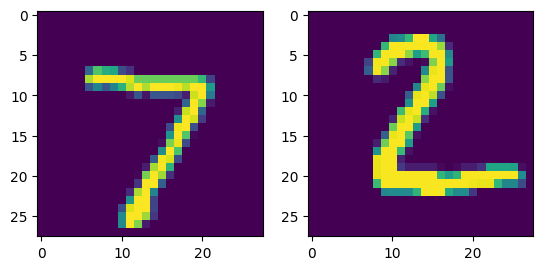

In [36]:
#Plot test data
fig = plt.figure()

fig.add_subplot(1,2, 1)
plt.imshow(batches[0])

fig.add_subplot(1,2,2)
plt.imshow(batches[1])

That's all thank you and good bye